In [277]:
import random 
import pulp
import numpy as np

# Initial Modleing

The optimization problem can be formulated as follows:

\begin{equation}
\begin{aligned}
\label{eq::optimization}
\min & \sum_{n\in N} y_{n}\\
s.t. & \sum_{n\in N} x_{i}^{n} \geq b_{i} \forall i\\
& \sum_{i} x_{i}^{n} \cdot l_{i} \leq L \cdot y_{n}; \forall n\\
\end{aligned}
\end{equation}

# Column Generation Formulation

For the column generation formulation, the different patterns the rolls can be cut into are the main focus:

\begin{equation}
\begin{aligned}
\label{eq::RMS}
\min & Z=\sum_{p} x_{p}\\
s.t. & \sum A \cdot X \geq b \\
& x_{p} \geq 0\\
\end{aligned}
\end{equation}

# Dual Problem

Dual pronlem:

\begin{equation}
\begin{aligned}
\label{eq::Dual}
\max & Z^{dual}=\sum_{p} b^{T} \cdot \pi\\
s.t. & \sum A^{T} \cdot \pi \leq 1 \\
& \pi_{i} \geq 0\\
\end{aligned}
\end{equation}






# Cutting Stock Problem (CSP)

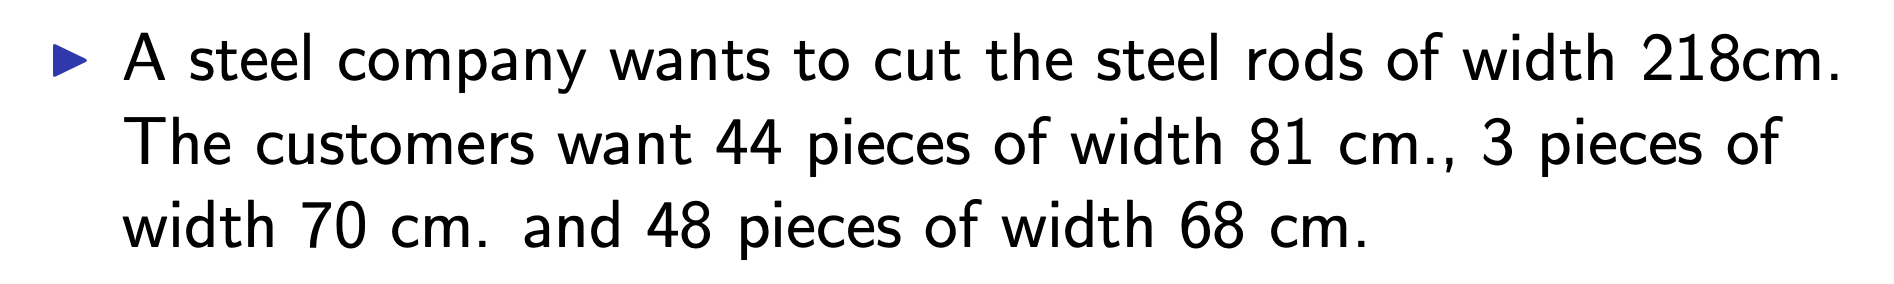

In [281]:
'''Prblem definitions'''

Roll_length=218
Item_Lengths=[81,70,68]
Item_Demands=[44,3,48]
Items_num=3

'''Patterns'''

patterns=np.identity(Items_num,dtype='int')




# Initial master problem

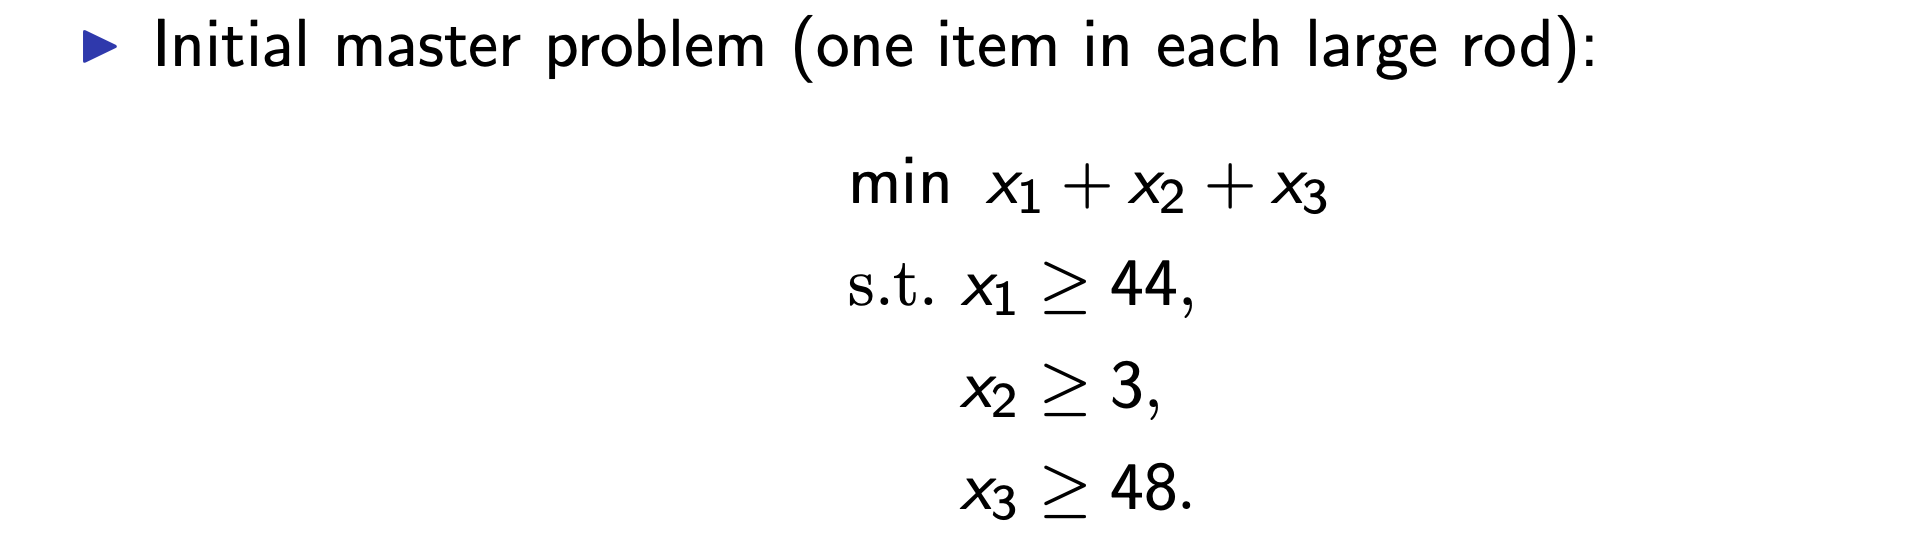

In [258]:
'''Model definition'''

prob = LpProblem('P1',pulp.LpMinimize)

'''Variable'''

X = pulp.LpVariable.dicts("X",(i for i in range(patterns.shape[0])),lowBound=0, cat='Continuous')

'''Objective'''

prob+=pulp.lpSum([X[i] for i in range(patterns.shape[0])])

'''Constraints'''

for i in range(patterns.shape[1]):

    constraint = pulp.lpSum([X[j]*patterns[j][i] for j in range(patterns.shape[0])]) >= pulp.lpSum([Item_Demands[i]*patterns[j][i] for j in range(patterns.shape[0])])
    
    prob += constraint
    
'''Solving'''

prob.solve()

'''Dual Optiaml'''

Dual=[prob.constraints[i].pi for i in prob.constraints]

Dual

[1.0, 1.0, 1.0]

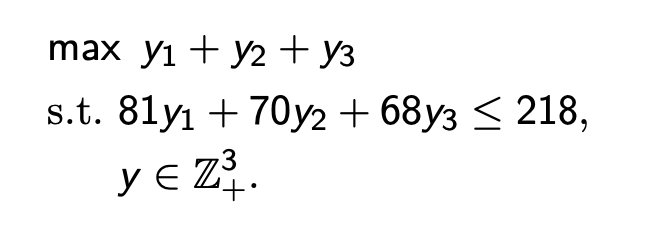

In [259]:
'''Sub problems'''

sub_prob=LpProblem('P2',pulp.LpMaximize)


'''Variable'''

Y = pulp.LpVariable.dicts("Y",(i for i in range(patterns.shape[1])),lowBound=0, cat='Continuous')



'''Objective'''

sub_prob+=pulp.lpSum([Y[i]*Dual[i] for i in range(patterns.shape[1])])



'''Constraints'''


sub_prob+=pulp.lpSum([Y[i]*Item_Lengths[i] for i in range(patterns.shape[1])])<=Roll_length


'''Solving'''

sub_prob.solve()

if 1-pulp.value(sub_prob.objective)<0:
    
    New=np.array([[Y[var].varValue for var in Y]],dtype='int')
    
    patterns=np.append(patterns, New, axis=0)
    
    
patterns



array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 3]])

In [260]:
'''Model definition'''

prob = LpProblem('P1',pulp.LpMinimize)

'''Variable'''

X = pulp.LpVariable.dicts("X",(i for i in range(patterns.shape[0])),lowBound=0, cat='Continuous')

'''Objective'''

prob+=pulp.lpSum([X[i] for i in range(patterns.shape[0])])

'''Constraints'''

for i in range(patterns.shape[1]):

    constraint = pulp.lpSum([X[j]*patterns[j][i] for j in range(patterns.shape[0])]) >= pulp.lpSum([Item_Demands[i]*patterns[j][i] for j in range(patterns.shape[0])])
    
    prob += constraint
    
'''Solving'''

prob.solve()

'''Dual Optiaml'''

Dual=[prob.constraints[i].pi for i in prob.constraints]

Dual


[1.0, 1.0, 0.33333333]

In [322]:
class CSP:
    def __init__(self,Item_Lengths,Item_Demands,Roll_length,Patterns):
        
        '''Param'''
        self.Item_Lengths=Item_Lengths
        self.Item_Demands=Item_Demands
        self.Roll_length=Roll_length
        self.Patterns=Patterns
        '''Sub param'''
        
        self.varList=[]
        
    def Get_prolem(self):
        
        self.Patt_num=self.Patterns.shape[0]
        self.Item_num=self.Patterns.shape[1]
        
        '''Master problem'''

        self.prob = pulp.LpProblem('P1',pulp.LpMinimize)
        
        
        '''Variable'''

        self.X = pulp.LpVariable.dicts("X",(i for i in range(self.Patt_num)),lowBound=0, cat='Continuous')

        '''Objective'''

        self.prob += pulp.lpSum([self.X[i] for i in range(self.Patt_num)])

        '''Constraints'''

        for i in range(self.Item_num):

            constraint = pulp.lpSum([self.X[j]*self.Patterns[j][i] for j in range(self.Patt_num)]) >= self.Item_Demands[i]

            self.prob += constraint
            
    def Get_solve(self):

        '''Solving'''

        self.prob.solve()

        '''Dual Optiaml'''

        Dual=[self.prob.constraints[i].pi for i in self.prob.constraints]

        return Dual
    
    def Get_sub_problem(self,Dual):
        
        self.Patt_num=self.Patterns.shape[0]
        self.Item_num=self.Patterns.shape[1]
        
        
        '''Sub problems'''

        self.sub_prob=pulp.LpProblem('P2',pulp.LpMaximize)


        '''Variable'''

        self.Y= pulp.LpVariable.dicts("Y",(i for i in range(self.Item_num)),lowBound=0, cat='Continuous')

        '''Objective'''

        self.sub_prob+=pulp.lpSum([self.Y[i]*Dual[i] for i in range(self.Item_num)])

        '''Constraints'''

        self.sub_prob+=pulp.lpSum([self.Y[i]*self.Item_Lengths[i] for i in range(self.Item_num)])<=self.Roll_length
        
    def Get_sub_solve(self):
        
        self.sub_prob.solve()
    
    def Add_pattern(self):
        
        New=np.array([[self.Y[var].varValue for var in self.Y]],dtype='int')
    
        self.Patterns=np.append(self.Patterns, New, axis=0)
        
    
        
        
        
        
    
        

In [333]:
'''Prblem definitions'''

Roll_length=218
Item_Lengths=[81,70,68]
Item_Demands=[44,3,48]
Items_num=3

'''Patterns'''

patterns=np.identity(Items_num,dtype='int')

'''Construct the problems'''

Csp=CSP(Item_Lengths,Item_Demands,Roll_length,patterns)

Csp.Get_prolem()

Dual=Csp.Get_solve()

Csp.Get_sub_problem(Dual)

Csp.Get_sub_solve()

iteration=100

Obj_arr=[]

Sub_Obj_arr=[]

for i in range(10):
    
    print(1-pulp.value(Csp.sub_prob.objective))
    
    Obj_arr.append(pulp.value(Csp.prob.objective))
    
    Sub_Obj_arr.append(pulp.value(Csp.sub_prob.objective))
    
    Csp.Add_pattern()
    
    Csp.Get_prolem()
    
    Dual=Csp.Get_solve()

    Csp.Get_sub_problem(Dual)
    
    Csp.Get_sub_solve()
    

-2.2058824
-2.1142857
-1.6913580000000001
-0.34567900000000007
-0.34567900000000007
-0.34567900000000007
-0.34567900000000007
-0.34567900000000007
-0.34567900000000007
-0.34567900000000007


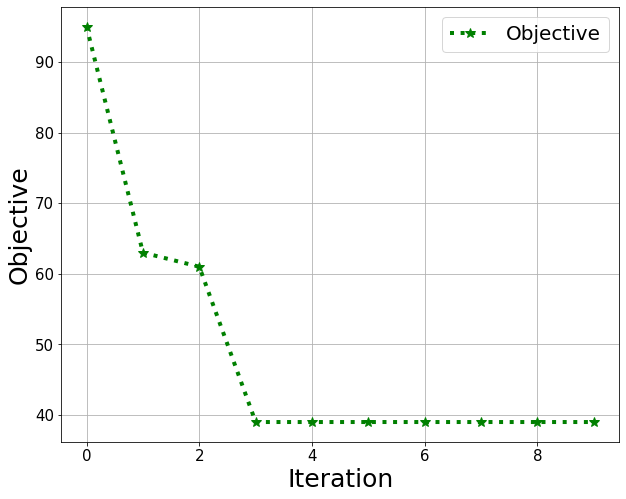

In [334]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.patches import Ellipse, Circle

figsize = 10,8

figure, ax1 = plt.subplots(figsize=figsize)

labels = ax1.get_xticklabels() + ax1.get_yticklabels()

[label.set_fontsize(15) for label in labels]



'''Hotspot walk'''

ax1.plot(range(len(Obj_arr)), Obj_arr, color='g',linestyle=':',marker='*',linewidth=4, markersize=10,label='Objective')

ax1.set_ylabel('Objective',size=25) 

ax1.set_xlabel('Iteration',size=25)

ax1.legend(loc = 'upper right',fontsize=20)

plt.grid()

plt.show()